<a href="https://colab.research.google.com/github/bhanuchaddha/The-Ai-Handbook/blob/main/4-AI-Agents/retail_arrangement_analysis_agent/Multi_Agent_Retail_Arrangement_Analysis_Tool_with_CrewAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retail Arrangement Analysis Tool

## Demo

[![Watch the Demo]](https://youtu.be/ZoHKBUPeIyw?si=wC8GRagWHYmiFiAg)


## System Diagram

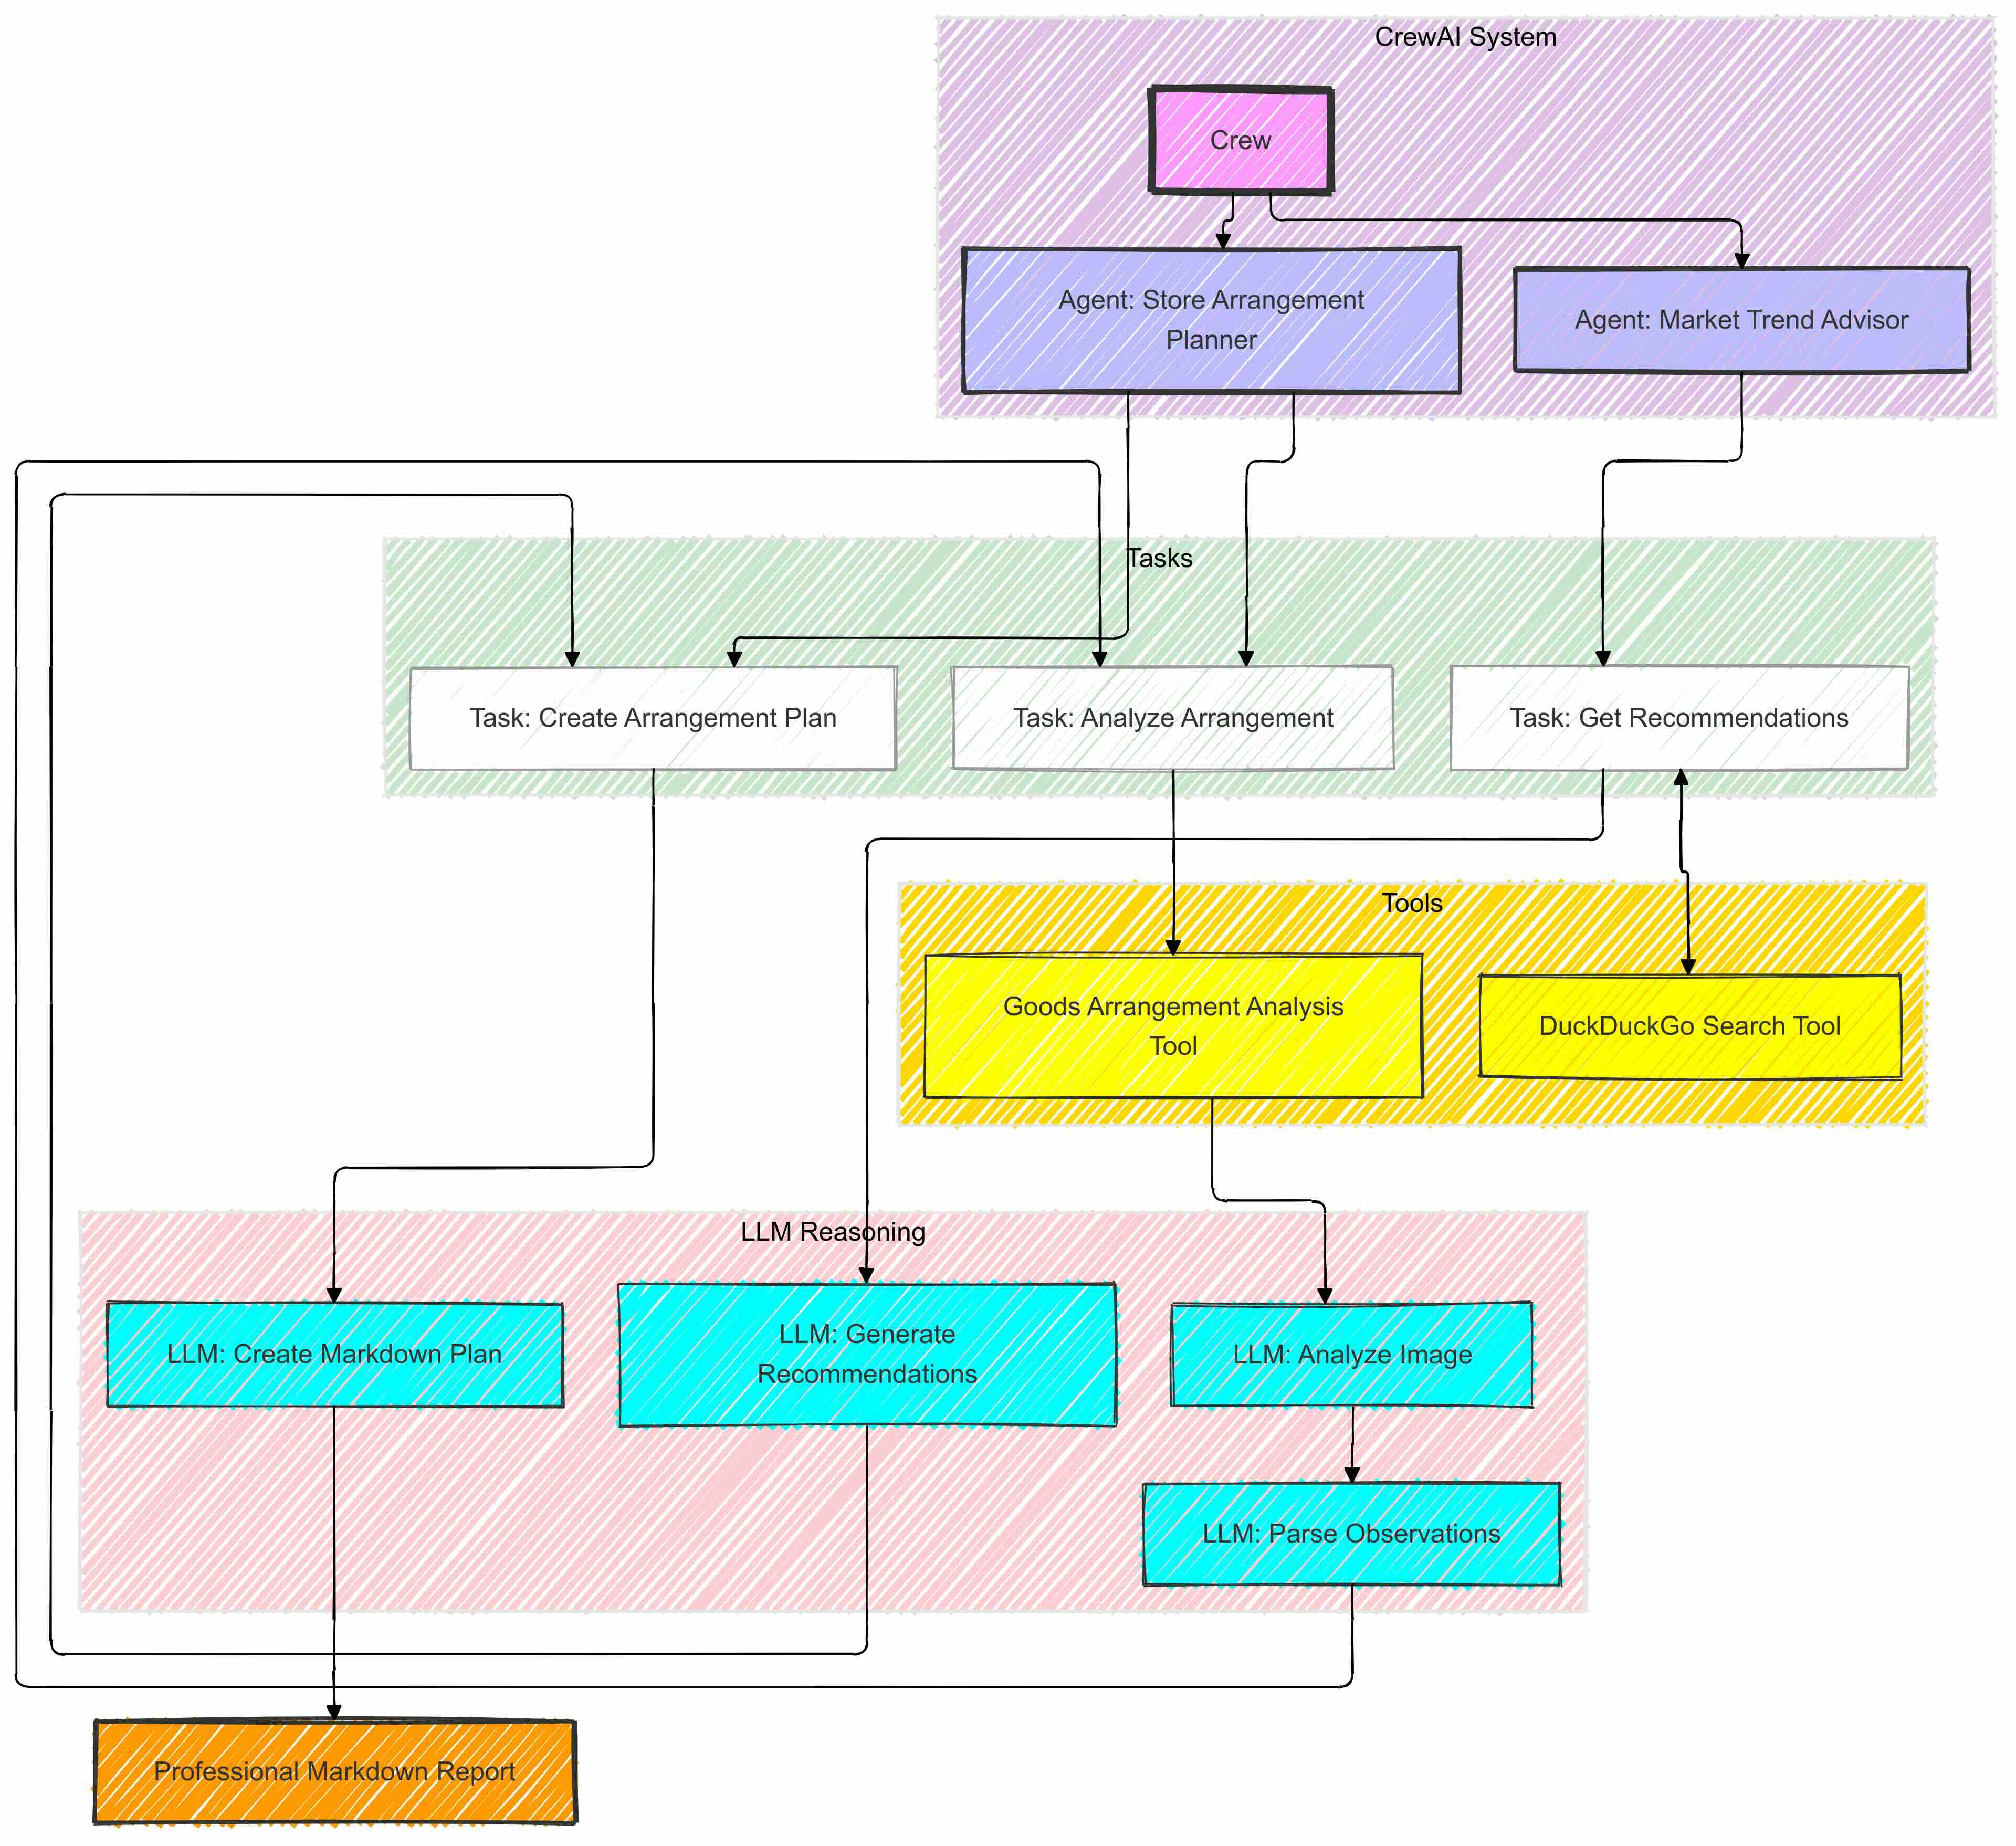



## What Will We Create?
We will create a **Retail Arrangement Analysis Tool**, an innovative AI-powered solution designed to analyze images of store shelves and provide detailed insights into product arrangements. This tool will identify store types, evaluate goods placement, and suggest actionable recommendations to optimize store layout and boost sales. By leveraging AI, computer vision, and retail market expertise, this tool will serve as the ultimate assistant for store managers and market analysts striving for retail excellence.

In short, we’re bringing Sherlock Holmes’s attention to detail to the world of retail, minus the Victorian hat.

---

## Potential User

Meet Michal, the proud owner of a bustling **clothing store**. Always striving for excellence, Michal dreams of creating a seamless shopping experience for customers while maximizing sales potential. However, managing shelf arrangements and keeping up with market trends is no walk in the park. That’s where the **Goods Arrangement Analysis Tool** steps in to save the day.

One day, Michal notices that the store’s displays look more like a rummage sale than a curated fashion haven. With the help of this tool, Michal uploads images of the store’s sections, receives a detailed breakdown of the arrangement, and gets expert recommendations from the Market Trend Advisor agent.

With a little AI magic, Michal can now:

- Spot issues like cluttered racks or underutilized display space.
- Understand how to reorganize goods for better visibility and appeal.
- Gain market-aligned insights to enhance customer satisfaction and boost sales.

Retail harmony achieved, Michal can finally focus on expanding the business and maybe even plan that long-overdue vacation.

---

## Technology Being Used
Our project leverages cutting-edge technology and robust libraries to deliver insights with precision:

- **Python**: The backbone of our application, tying everything together like a seasoned maestro.
- **CrewAI**: A powerful multi-agent framework that enables seamless collaboration between roles like Store Planner and Market Analyst.
- **OpenAI GPT-4o-mini**: A lightweight but capable LLM for generating detailed and insightful analyses.
- **Gradio**: A simple yet effective library to create a user-friendly web interface for image uploads and result viewing.
- **DuckDuckGo Search API**: For sourcing additional market trends and data, because Google’s not the only search wizard in town.

---

## Implementation


### Code
The codebase is structured into modular components:
- **Image Upload Functionality**: Uploads images to catbox.moe and retrieves the image URL.
- **Goods Arrangement Analysis Tool**: Processes the image using GPT-4o-mini to identify store types and analyze arrangements.
- **DuckDuckGo Search Tool**: Provides market insights to align recommendations with current trends.
- **Agents and Tasks**: Simulate a collaborative workflow between the Store Manager and Market Analyst.
- **Main Crew Process**: Orchestrates the entire process, ensuring smooth execution of tasks.

### Frontend Using Gradio
To make the application user-friendly, we’ll integrate **Gradio** for the frontend. This web interface will allow users to:
1. Upload images of store shelves.
2. View detailed analysis reports.
3. Access actionable recommendations.

Gradio provides a clean, drag-and-drop interface that even your grandma could use (though she might mistake it for a virtual puzzle game).

---

## Agents
Agents are the heart of the system, each designed with specific roles and expertise to ensure seamless collaboration:

1. **Store Manager Agent**

   - **Role**: Store Arrangement Planner.
   - **Goal**: Analyze the arrangement of goods in the store and generate a detailed report for the Market Analyst.
   - **Backstory**: This agent specializes in examining store layouts, assessing product placement, and optimizing space utilization.
   - **Tool Used**: Goods Arrangement Analysis Tool for identifying store types and analyzing goods arrangements.

2. **Market Analyst Agent**

   - **Role**: Market Trend Advisor.
   - **Goal**: Provide recommendations for improving goods arrangements based on market trends.
   - **Backstory**: This agent possesses deep knowledge of market trends and consumer behavior, enabling effective recommendations for enhanced sales and customer satisfaction.
   - **Tool Used**: DuckDuckGo Search Tool for gathering market insights.

---

## Tasks
Tasks define the workflow and guide agents in achieving their goals. Here’s the breakdown:

1. **Analyze Arrangement**

   - **Description**: Use the Goods Arrangement Analysis Tool to identify the store type and analyze the current arrangement of goods in the provided image.
   - **Output**: A detailed report including the store type, product placement, and any visible issues.
   - **Assigned Agent**: Store Manager Agent.

2. **Get Recommendations**

   - **Description**: Review the arrangement report and use market knowledge to generate actionable recommendations for optimization.
   - **Output**: A set of recommendations aligned with market trends and consumer preferences.
   - **Assigned Agent**: Market Analyst Agent.

3. **Create Arrangement Plan**

   - **Description**: Develop a detailed plan for rearranging goods based on the Market Analyst’s recommendations.
   - **Output**: A comprehensive action plan for improving goods arrangement.
   - **Assigned Agent**: Store Manager Agent.

---

## Crew
The Crew component brings it all together, orchestrating the interaction between agents and tasks:

- **Agents Involved**: Store Manager Agent and Market Analyst Agent.
- **Tasks Sequence**: Tasks are executed in a sequential process to ensure logical flow and completeness.
- **Process Management**: CrewAI’s `Crew` and `Process` classes manage task execution, ensuring that each agent fulfills its role effectively.
- **Collaboration**: Agents collaborate seamlessly to produce actionable insights and practical plans for store optimization.

---

## How to Use the App

Using the **Goods Arrangement Analysis Tool** is as simple as shopping for your favorite snacks (which, incidentally, you’ll find better organized thanks to this app):

1. **Upload an Image**: Drag and drop an image of your store’s shelf or section into the Gradio interface.
2. **Analyze Goods Arrangement**:
   - The tool identifies the store type (e.g., grocery aisle, electronics display).
   - It provides a detailed breakdown of the goods arrangement, including product placement, visible issues, and space utilization.
3. **Get Recommendations**: The Market Analyst agent evaluates the report and generates actionable suggestions aligned with current trends.
4. **Download the Plan**: The Store Planner agent transforms recommendations into a practical rearrangement plan, which you can download and implement.

Now you’re equipped to turn your store into a retail paradise. As a bonus, your customers might even think you hired a retail wizard.

---

By combining AI, retail expertise, and a touch of humor, the **Goods Arrangement Analysis Tool** aims to revolutionize the way stores optimize their layouts. It’s not just a tool; it’s your new retail superhero.



In [ ]:
!pip install crewai langchain openai gradio httpx python-dotenv  duckduckgo-search langchain-community

In [ ]:
from google.colab import userdata
import os
openai_api_key = userdata.get('OPENAI_API_KEY')
os.environ['OPENAI_API_KEY'] = openai_api_key

# Setup

In [ ]:
import base64
import gradio as gr
from dotenv import load_dotenv
from crewai import Agent, Task, Crew, Process
from crewai.tools import BaseTool
from langchain_openai import ChatOpenAI
from langchain_community.tools import DuckDuckGoSearchRun
from langchain.utilities import DuckDuckGoSearchAPIWrapper
from langchain_core.prompts import ChatPromptTemplate
from google.colab import userdata, files
import os
from io import BytesIO
from typing import Optional
from PIL import Image
from openai import OpenAI
import requests  # Import the requests library
import logging  # Import the logging module

# Basic logging configuration - try this first
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

client = OpenAI()

# Retrieve API Key from Colab Secrets
openai_api_key = userdata.get('OPENAI_API_KEY')
os.environ['OPENAI_API_KEY'] = openai_api_key

# Load environment variables
load_dotenv()

# Set up language model
llm = ChatOpenAI(model="gpt-4o-mini")  # Or another suitable model

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_config.py:345: UserWarning: Valid config keys have changed in V2:
* 'fields' has been removed
  warnings.warn(message, UserWarning)



### Tools

The agents use specialized tools to complete their tasks effectively:

1. **Goods Arrangement Analysis Tool:**
   - This tool processes images of store layouts, extracting data about product placement, store type, and potential issues. It enables the Store Arrangement Planner to understand the current state of the store arrangement visually.

2. **DuckDuckGo Search Tool:**
   - Used by the Market Trend Advisor, this tool performs web searches to gather information about current market trends, consumer preferences, and best practices.

These tools integrate seamlessly into the agents' workflows, ensuring that the system can process both visual and textual data efficiently.

In [ ]:
def upload_image_to_catbox(image_path):
    """Uploads an image to catbox.moe and returns the URL."""
    url = 'https://catbox.moe/user/api.php'
    data = {'reqtype': 'fileupload', 'userhash': ''}
    try:
        files = {'fileToUpload': open(image_path, 'rb')}
        response = requests.post(url, data=data, files=files)
        response.raise_for_status()  # Raise an exception for bad status codes
        return response.text.strip()
    except Exception as e:
        return f"Error uploading image: {e}"

class GoodsArrangementAnalysisTool(BaseTool):
    name: str = "Goods Arrangement Analysis Tool"
    description: Optional[str] = "Useful for getting a detailed description of the existing arrangement of goods in an image, identifying the store type, product names, placement, and any issues. Input should be an image URL."

    def _run(self, image_url: str) -> str:
        try:
            response = client.chat.completions.create(
                model="gpt-4o-mini",
                messages=[
                    {
                        "role": "user",
                        "content": [
                            {
                                "type": "text",
                                "text": """Analyze this image to identify the type of store or section it is (e.g., grocery aisle, clothing rack, electronics display, etc.) and describe the current arrangement of goods in detail.
                                Pay close attention to product names, product placement, and any visible issues.
                                Please provide the store type first, followed by the detailed description of the goods arrangement.""",
                            },
                            {
                                "type": "image_url",
                                "image_url": {"url": image_url},
                            },
                        ],
                    }
                ],
                max_tokens=1024,
            )
            return response.choices[0].message.content
        except Exception as e:
            return f"Error analyzing goods arrangement: {e}"

class DuckDuckGoSearchTool(BaseTool):
    name: str = "DuckDuckGo Search"
    description: Optional[str] = "A tool for searching the web using DuckDuckGo"

    def _run(self, query: str) -> str:
        search = DuckDuckGoSearchAPIWrapper()
        return search.run(query)

### Agents and Tasks

#### Agents

The system is designed with two key agents, each having specific roles and goals:

1. **Store Arrangement Planner:**
   - This agent is responsible for analyzing the arrangement of goods in the store. It evaluates product placement, identifies issues, and creates detailed reports for further processing.
   - Its goal is to optimize space utilization and improve customer experience by suggesting actionable changes.

2. **Market Trend Advisor:**
   - This agent leverages market trends and consumer behavior data to provide expert recommendations. It complements the analysis performed by the Store Arrangement Planner by adding a strategic layer to the recommendations.
   - The goal is to align the arrangement plan with market trends to maximize sales and satisfaction.

#### Tasks

Tasks are the actions performed by the agents to achieve the overall objective:

1. **Analyze Arrangement:**
   - This task involves examining a provided image to identify the store type, analyze the layout, and note any visible issues in the arrangement.

2. **Get Recommendations:**
   - After analyzing the arrangement, this task involves researching market trends and generating insights to suggest improvements.

3. **Create Arrangement Plan:**
   - This task compiles all insights and recommendations into a structured Markdown report, providing a clear and actionable plan.


In [ ]:


# Define agents
store_manager = Agent(
    role='Store Arrangement Planner',
    goal='Analyze the arrangement of goods in the physical store and provide a detailed report to the market analyst for recommendations.',
    backstory="""As the Store Arrangement Planner, you are responsible for examining the store's layout and the arrangement of goods.
    You assess product placement, and optimize space utilization across different store types or sections.
    You have access to advanced tools for visualizing goods arrangement, which help you
    collect accurate data on the current placement of products.
    You are capable to translate market analysis into a plan for the store
    or specific sections.""",
    verbose=True,
    tools=[GoodsArrangementAnalysisTool()],
    llm=llm,
    allow_delegation=False
)

market_analyst = Agent(
    role='Market Trend Advisor',
    goal='Provide recommendations to improve the arrangement of goods based on market trends.',
    backstory="""As the Market Trend Advisor, you possess in-depth knowledge of market trends and consumer behavior.
    Your experience and keen sense of retail enable you to propose effective recommendations
    for different store types and sections. You analyze reports provided by the Store Arrangement Planner to suggest
    improvements that enhance sales and customer experience.""",
    verbose=True,
    tools=[DuckDuckGoSearchTool()],
    llm=llm,
    allow_delegation=True
)

# Define tasks
def create_tasks(image_url):
    analyze_arrangement = Task(
        description=f"""Use the Goods Arrangement Analysis Tool to identify the store type and collect visual data on the current arrangement of goods from the provided image URL.
        The image URL is: '{image_url}'.
        Prepare a detailed report highlighting the current layout, products, product placement, and any observed issues.
        Ensure the report is detailed at the level of product names and begins with the identified store type.""",
        expected_output="""A comprehensive report on the identified store type, including the store type name, visual data,
        analysis of the goods arrangement, space utilization, and any initial observations.""",
        agent=store_manager
    )

    get_recommendations = Task(
        description="""Review the report on the goods arrangement provided by the Store Arrangement Planner.
        Utilize your immense knowledge of the retail market and internet to assess current trends relevant to the products in this store type.
        Develop expert recommendations to optimize sales and customer satisfaction through improved goods arrangement.
        Ensure the recommendations are detailed and include specific product names or categories.""",
        expected_output="""A set of actionable recommendations for improving the arrangement of goods in the store type,
        aligned with current market trends and consumer preferences.""",
        agent=market_analyst
    )


    create_arrangement_plan = Task(
      description=f"""Review the recommendations provided by the Market Trend Advisor.
      Create a **professional Markdown report** for optimizing the store's goods placement and layout. The report should be polished, well-structured, and ready for direct presentation or sharing with stakeholders. Include:

      - Strategic recommendations from the Market Trend Advisor, translated into actionable plans.
      - Clear, formal language with a professional tone.
      - Proper use of Markdown formatting, including headers, bullet points, tables, and other elements to enhance readability.
      - Detailed justifications for each recommendation, using **data-driven insights** or **industry standards**.
      - An emphasis on **scalability and adaptability** for different store types or layouts.

      Structure the Markdown file as follows:

      ### Executive Summary
      - Provide a brief overview of the store type, key observations, and primary goals.

      ### Detailed Analysis and Insights
      - Summarize key findings from the goods arrangement analysis.
      - Highlight any issues or opportunities observed.

      ### Proposed Changes to Existing Arrangements
      - Use a detailed table to outline specific changes:
        | Product/Category         | Current Location        | Recommended New Location   | Justification                        |
        |--------------------------|-------------------------|----------------------------|--------------------------------------|
        | Example Product          | Aisle 1                | Aisle 3                    | Increases visibility and sales       |

      ### Suggestions for New Items or Relocations
      - List new product recommendations or relocations, along with potential impacts.

      ### Implementation Roadmap
      - Use numbered steps to provide a clear action plan.
      - Include potential risks, required resources, and estimated timelines.

      ### Key Performance Indicators (KPIs)
      - Use a bullet list to define metrics for success (e.g., sales uplift, customer satisfaction, inventory turnover).

      ### Expected Business Outcomes
      - Describe expected benefits in a detailed bullet list, such as:
        - Improved revenue by X%.
        - Enhanced customer experience and loyalty.
        - Optimized inventory management.

      ### Visuals and Charts (Optional)
      - Include visuals (e.g., bar charts or pie charts) for sales data or customer flow patterns where applicable.

      Ensure the Markdown file is **error-free, professionally formatted, and visually engaging**. Use a formal tone to make it suitable for both operational staff and professional consultants. The image URL for reference is: '{image_url}'.""",
      expected_output="""### Executive Summary
      - Overview of the store type and arrangement analysis.
      - Primary goals of the plan.

      ### Detailed Analysis and Insights
      - Key findings from the goods arrangement analysis, supported by professional observations.

      ### Proposed Changes to Existing Arrangements
      - **Table Format**:
        | Product/Category         | Current Location        | Recommended New Location   | Justification                        |
        |--------------------------|-------------------------|----------------------------|--------------------------------------|
        | Example Product          | Aisle 1                | Aisle 3                    | Increases visibility and sales       |

      ### Suggestions for New Items or Relocations
      - New product recommendations or relocation suggestions, with impacts.

      ### Implementation Roadmap
      - **Numbered Steps** for execution, including:
        1. Resources required.
        2. Estimated timelines.
        3. Risk considerations.

      ### Key Performance Indicators (KPIs)
      - Metrics to measure success:
        - Sales uplift.
        - Improved customer satisfaction scores.
        - Inventory turnover rates.

      ### Expected Business Outcomes
      - Detailed benefits:
        - Increased revenue.
        - Enhanced customer experience.
        - Optimized space utilization.

      ### Visuals and Charts (Optional)
      - Include visuals for clarity and impact where applicable.

      Ensure the final Markdown file is polished, structured, and professional.""",
      agent=store_manager
  )
    return [analyze_arrangement, get_recommendations, create_arrangement_plan]

# Define crew creation function
def create_crew(tasks):
    retail_crew = Crew(
        agents=[store_manager, market_analyst],
        tasks=tasks,
        process=Process.sequential,
        verbose=True
    )
    return retail_crew

# Define main function to run CrewAI process
def run_crewai(image_url):
    try:
        tasks = create_tasks(image_url)
        crew = create_crew(tasks)
        result = crew.kickoff()
        return str(result)
    except Exception as e:
        return f"Error processing image or running CrewAI: {e}"



In [ ]:
# --- Direct Colab Execution ---
# if __name__ == "__main__":
#     print("Please upload an image file:")
#     uploaded = files.upload()

#     if uploaded:
#         image_filename = list(uploaded.keys())[0]
#         # Save the uploaded image to a temporary file
#         with open(image_filename, 'wb') as f:
#             f.write(uploaded[image_filename])

#         # Upload the image to Catbox
#         image_url = upload_image_to_catbox(image_filename)

#         # Clean up the temporary file
#         os.remove(image_filename)

#         if image_url and not image_url.startswith("Error"):
#             print(f"Image uploaded successfully. Catbox URL: {image_url}")
#             output = run_crewai(image_url)
#             print("\n--- Analysis and Action Plan ---")
#             print(output)
#         else:
#             print(f"Error uploading image to Catbox: {image_url}")
#     else:
#         print("No image file uploaded.")

In [ ]:
import re
# Gradio function to handle image upload and run CrewAI
def analyze_image_and_plan(image):
    if image is None:
        return "No image uploaded."

    try:
        # Save the uploaded image to a temporary file
        image_filename = "temp_image.png"  # You can use a more unique name if needed
        image.save(image_filename)

        # Upload the image to Catbox
        image_url = upload_image_to_catbox(image_filename)

        # Clean up the temporary file
        os.remove(image_filename)

        if image_url and not image_url.startswith("Error"):
            print(f"Image uploaded successfully. Catbox URL: {image_url}")
            output = run_crewai(image_url)
            output=re.sub(r"```.*?\n", "", output).strip()
            return str(output)
        else:
            return f"Error uploading image to Catbox: {image_url}"
    except Exception as e:
        return f"Error processing image: {e}"

### Fontend using Gradio

In [ ]:
# Gradio interface
with gr.Blocks() as iface:
    # Include custom CSS in HTML
    gr.HTML(
        """
        <style>
        #main-header {
            text-align: center;
            font-family: 'Arial', sans-serif;
            font-size: 24px;
            color: #2A2A2A;
            margin-bottom: 20px;
        }

        #image-upload label {
            font-size: 16px;
            color: #2A2A2A;
            font-weight: bold;
        }

        #recommend-button {
            background-color: #4CAF50 !important;
            color: white !important;
            border-radius: 5px !important;
            padding: 10px 20px !important;
            margin-top: 10px !important;
            font-size: 16px !important;
            border: none !important;
            cursor: pointer !important;
        }

        #recommend-button:hover {
            background-color: #45A049 !important;
        }

        #output-area {
            font-size: 16px;
            color: #2A2A2A;
            margin-top: 30px;
            border-top: 1px solid #DDD;
            padding-top: 15px;
        }
        </style>
        """
    )

    # Header Section
    gr.Markdown(
        """
        # Retail Arrangement Analysis Tool
        Upload your store layout image to receive AI-driven recommendations for an optimal arrangement.
        """,
        elem_id="main-header"
    )

    # Main Upload Section
    with gr.Row():
        with gr.Column():
            image_input = gr.Image(
                type="pil",
                label="Upload Store Image",
                elem_id="image-upload"
            )
            recommend_button = gr.Button(
                "Get Recommendation",
                variant="secondary",
                elem_id="recommend-button"
            )

    # Output Section
    plan_output = gr.Markdown(
        "### Store Arrangement Plan\nResults will appear here after processing.",
        elem_id="output-area"
    )

    # Button Click Event
    recommend_button.click(
        fn=analyze_image_and_plan,
        inputs=image_input,
        outputs=plan_output
    )

iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f56e0612509dcae8c9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Image uploaded successfully. Catbox URL: https://files.catbox.moe/3z94hx.png
# Agent: Store Arrangement Planner
## Task: Use the Goods Arrangement Analysis Tool to identify the store type and collect visual data on the current arrangement of goods from the provided image URL.
        The image URL is: 'https://files.catbox.moe/3z94hx.png'.
        Prepare a detailed report highlighting the current layout, products, product placement, and any observed issues.
        Ensure the report is detailed at the level of product names and begins with the identified store type.


# Agent: Store Arrangement Planner
## Thought: I need to analyze the image provided to identify the store type and gather detailed information about the arrangement of goods.
## Using tool: Goods Arrangement Analysis Tool
## Tool Input: 
"{\"image_url\": \"https://files.catbox.moe/3z94hx.png\"}"
## Tool Output: 
**Store Type:** Grocery Store (Produce Section)

**Detailed Description of Goods Arrangement:**

The image sho

/usr/local/lib/python3.10/dist-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: 'api' backend is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(




# Agent: Market Trend Advisor
## Thought: I need to gather current market trends and consumer preferences relevant to the grocery store's produce section to develop effective recommendations for improving goods arrangement.
## Using tool: DuckDuckGo Search
## Tool Input: 
"{\"query\": \"current trends in grocery store produce section arrangement 2023\"}"
## Tool Output: 
Feb 21, 2023 ... 1. Retailers Will Seek Greater Visibility into Perishables · 2. Discount and Value Stores Are Gaining Market Share · 3. Grocers Will Focus on the ... As food prices continue to increase, shoppers are seeking higher-value products. In 2024, "value shopping" in the grocery store context refers to consumers ... Sep 25, 2023 ... Grocery executives face a host of new challenges, including flat growth and margin pressure. Five trends could point the way to renewed ... Sep 6, 2024 ... Why layout matters in grocery stores ... There were 62,383 grocery stores and supermarket businesses in the US in 2023. Thes

Image uploaded successfully. Catbox URL: https://files.catbox.moe/3z94hx.png
# Agent: Store Arrangement Planner
## Task: Use the Goods Arrangement Analysis Tool to identify the store type and collect visual data on the current arrangement of goods from the provided image URL.
        The image URL is: 'https://files.catbox.moe/3z94hx.png'.
        Prepare a detailed report highlighting the current layout, products, product placement, and any observed issues.
        Ensure the report is detailed at the level of product names and begins with the identified store type.


# Agent: Store Arrangement Planner
## Thought: I will analyze the provided image to identify the store type and gather detailed information about the arrangement of goods.
## Using tool: Goods Arrangement Analysis Tool
## Tool Input: 
"{\"image_url\": \"https://files.catbox.moe/3z94hx.png\"}"
## Tool Output: 
**Store Type:** Grocery Store (Produce Section)

**Description of Goods Arrangement:**
The image features a well-

/usr/local/lib/python3.10/dist-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: 'api' backend is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(




# Agent: Market Trend Advisor
## Thought: I need to gather current market trends and consumer preferences related to grocery store produce sections to develop actionable recommendations for improving the arrangement of goods.
## Using tool: DuckDuckGo Search
## Tool Input: 
"{\"query\": \"current trends in grocery store produce section layout and arrangement 2023\"}"
## Tool Output: 
Sep 6, 2024 ... Why layout matters in grocery stores ... There were 62,383 grocery stores and supermarket businesses in the US in 2023. These range in scale from ... As food prices continue to increase, shoppers are seeking higher-value products. In 2024, "value shopping" in the grocery store context refers to consumers ... Feb 21, 2023 ... 1. Retailers Will Seek Greater Visibility into Perishables · 2. Discount and Value Stores Are Gaining Market Share · 3. Grocers Will Focus on the ... Sep 25, 2023 ... Grocery executives face a host of new challenges, including flat growth and margin pressure. Five tre

/usr/local/lib/python3.10/dist-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: 'api' backend is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(




# Agent: Market Trend Advisor
## Thought: Thought: I need to analyze the trends found in the observation to formulate specific recommendations for the grocery store's produce section.
## Using tool: DuckDuckGo Search
## Tool Input: 
"{\"query\": \"grocery store produce section arrangement best practices 2023\"}"
## Tool Output: 
This often means an increase in sales for your store! Let's explore the best ways to improve your grocery store's produce area! Keep It Fresh. One of the biggest turn-offs for shoppers is finding spoiled or moldy produce in your store. To avoid this, make sure you check and restock your produce section throughout the day. Unleash the power of optimal produce display because it can remarkably boost your grocery store's appeal, fuel impulse purchases, and catapult your sales. ... theme-based arrangements can significantly boost the visual appeal of your produce section. For example, during autumn, integrate pumpkins, gourds, and corn with warm-colored leafy ...

Image uploaded successfully. Catbox URL: https://files.catbox.moe/3z94hx.png
# Agent: Store Arrangement Planner
## Task: Use the Goods Arrangement Analysis Tool to identify the store type and collect visual data on the current arrangement of goods from the provided image URL.
        The image URL is: 'https://files.catbox.moe/3z94hx.png'.
        Prepare a detailed report highlighting the current layout, products, product placement, and any observed issues.
        Ensure the report is detailed at the level of product names and begins with the identified store type.


# Agent: Store Arrangement Planner
## Thought: I need to analyze the provided image to identify the store type and gather detailed information about the arrangement of goods.
## Using tool: Goods Arrangement Analysis Tool
## Tool Input: 
"{\"image_url\": \"https://files.catbox.moe/3z94hx.png\"}"
## Tool Output: 
**Store Type:** Grocery Store - Produce Section

**Detailed Description of Goods Arrangement:**

The produce s

/usr/local/lib/python3.10/dist-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: 'api' backend is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(




# Agent: Market Trend Advisor
## Thought: I need to gather current trends and consumer preferences related to the grocery store produce section to provide actionable recommendations for improving the arrangement of goods.
## Using tool: DuckDuckGo Search
## Tool Input: 
"{\"query\": \"current trends in grocery store produce section arrangement 2023\"}"
## Tool Output: 
Traditional supermarkets and health/organic specialty stores have been losing share since 2020. Produce ecommerce was an area of growth for several years but lost ground in 2023. Food waste's financial impact may reduce produce purchases. Six in 10 Americans indicate fresh produce waste at home is an issue that they cannot financially afford. For grocery stores, last year held plenty of challenges - from high food-at-home prices to increased competition from non-traditional grocery players like dollar stores and superstores. But 2023 also offered the segment plenty of opportunities. Discount chains made a strong showin

Image uploaded successfully. Catbox URL: https://files.catbox.moe/g76qkg.png
# Agent: Store Arrangement Planner
## Task: Use the Goods Arrangement Analysis Tool to identify the store type and collect visual data on the current arrangement of goods from the provided image URL.
        The image URL is: 'https://files.catbox.moe/g76qkg.png'.
        Prepare a detailed report highlighting the current layout, products, product placement, and any observed issues.
        Ensure the report is detailed at the level of product names and begins with the identified store type.


# Agent: Store Arrangement Planner
## Thought: I need to analyze the provided image of the store to identify the store type and gather detailed information about the arrangement of goods.
## Using tool: Goods Arrangement Analysis Tool
## Tool Input: 
"{\"image_url\": \"https://files.catbox.moe/g76qkg.png\"}"
## Tool Output: 
**Store Type:** Clothing Store

**Detailed Description of Goods Arrangement:**

The store feature

/usr/local/lib/python3.10/dist-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: 'api' backend is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(




# Agent: Market Trend Advisor
## Thought: I need to gather current trends and consumer preferences in clothing store arrangements to provide effective recommendations for optimizing the store's layout and enhancing sales and customer satisfaction.
## Using tool: DuckDuckGo Search
## Tool Input: 
"{\"query\": \"current trends store arrangement clothing retail 2023\"}"
## Tool Output: 
Within the last few years, environmentally minded brands have enhanced online product pages with information about the impact of products, and in 2023, retailers highlighted their sustainability initiatives and impact in-store. Swedish clothing brand ASKET, for example, introduced The Impact Receipt to challenge over-consumption and support ... While this trend has grown rapidly since the start of the Covid-19 pandemic in 2020, it has continued to mature in 2023. GlobalData analysis shows that hirings for posts focused on contactless retail, future of work and ecommerce are up 26%, 15% and 13% year on ye

Image uploaded successfully. Catbox URL: https://files.catbox.moe/3z94hx.png
# Agent: Store Arrangement Planner
## Task: Use the Goods Arrangement Analysis Tool to identify the store type and collect visual data on the current arrangement of goods from the provided image URL.
        The image URL is: 'https://files.catbox.moe/3z94hx.png'.
        Prepare a detailed report highlighting the current layout, products, product placement, and any observed issues.
        Ensure the report is detailed at the level of product names and begins with the identified store type.


# Agent: Store Arrangement Planner
## Thought: I need to analyze the provided image to identify the store type and gather detailed information about the arrangement of goods.
## Using tool: Goods Arrangement Analysis Tool
## Tool Input: 
"{\"image_url\": \"https://files.catbox.moe/3z94hx.png\"}"
## Tool Output: 
**Store Type:** Grocery Store (Produce Section)

**Description of Goods Arrangement:**

The produce section in

/usr/local/lib/python3.10/dist-packages/langchain_community/utilities/duckduckgo_search.py:64: UserWarning: 'api' backend is deprecated, using backend='auto'
  ddgs_gen = ddgs.text(




# Agent: Market Trend Advisor
## Thought: I need to gather more information on current trends in grocery store produce sections to make informed recommendations for improving the arrangement of goods.
## Using tool: DuckDuckGo Search
## Tool Input: 
"{\"query\": \"current trends in grocery store produce section arrangement 2023\"}"
## Tool Output: 
Traditional supermarkets and health/organic specialty stores have been losing share since 2020. Produce ecommerce was an area of growth for several years but lost ground in 2023. Food waste's financial impact may reduce produce purchases. Six in 10 Americans indicate fresh produce waste at home is an issue that they cannot financially afford. "Flexibility with produce fixturing is crucial for maximizing sales and ensuring that the product offering remains relevant to customer demands, seasonality and trends," observes Jeff Cady, VP, produce and floral for Schenectady, N.Y.-based Northeast Shared Services, the main operating company of Tops

# Sample Execution

## Clothing Store

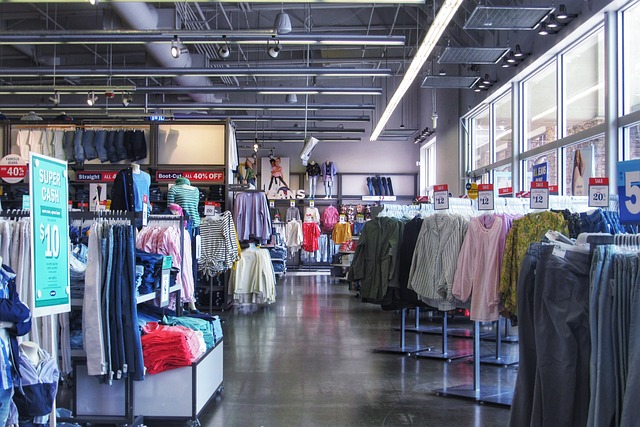

# Store Arrangement Optimization Report

## Executive Summary
This report provides a comprehensive analysis of the current arrangement of goods in a clothing retail store. The store features a well-defined layout, showcasing various apparel categories, including denim, shirts, and outerwear. The primary goals of this plan are to enhance product visibility, improve customer engagement, and ultimately drive sales by implementing strategic recommendations based on market trends.

## Detailed Analysis and Insights
The goods arrangement analysis reveals several strengths and opportunities within the store layout:
- **Strengths:**
  - Clear organization of apparel categories.
  - Visually appealing displays that attract customer attention.
  - Effective use of promotional signage to highlight discounts.

- **Opportunities:**
  - Potential for thematic displays that align with seasonal trends.
  - Enhancement of customer interaction through technology.
  - Improved categorization of items to facilitate easier shopping experiences.

## Proposed Changes to Existing Arrangements
| Product/Category         | Current Location        | Recommended New Location   | Justification                        |
|--------------------------|-------------------------|----------------------------|--------------------------------------|
| Seasonal Collections      | Front of the store      | Rotating display area      | Increases relevance and customer appeal during peak seasons. |
| Denim                       | Left side of store      | Central feature            | Enhances visibility and encourages interaction with a “Denim Bar.” |
| Shirts                     | Middle section          | Color-coded by occasion    | Aids in quicker selection and enhances customer experience. |
| Outerwear                  | Right side of store     | Layered display            | Promotes versatile fashion choices, encouraging higher sales. |

## Suggestions for New Items or Relocations
- **New Product Recommendations:**
  - Introduce eco-friendly clothing lines to cater to the growing market for sustainable fashion.
  - Add accessories that complement seasonal collections to encourage additional purchases.

- **Relocation Suggestions:**
  - Move promotional signage to eye-level and near high-traffic areas to maximize visibility and impulse buys.

## Implementation Roadmap
1. **Resource Assessment:**
   - Evaluate existing inventory and signage materials.
   - Allocate budget for new displays and technology integration.

2. **Timeline Estimation:**
   - Complete changes within 4-6 weeks, allowing for customer feedback and adjustment.

3. **Risk Considerations:**
   - Monitor customer reactions to new arrangements and be prepared to make quick adjustments based on feedback.

## Key Performance Indicators (KPIs)
- **Sales Uplift:** Measure the percentage increase in sales post-implementation.
- **Customer Satisfaction Scores:** Utilize surveys to assess shopping experience improvements.
- **Inventory Turnover Rates:** Track how quickly items sell after rearrangement.

## Expected Business Outcomes
- Increased revenue by 15% through improved product visibility and customer engagement.
- Enhanced customer experience leading to higher loyalty and repeat visits.
- Optimized space utilization, allowing for a broader product range and better inventory management.

## Visuals and Charts (Optional)
- **Bar Chart:** Sales data comparison before and after the implementation of the new arrangement (to be included in the final presentation).
- **Pie Chart:** Customer preferences on clothing categories, collected through surveys (to be included in the final presentation).

This report provides a structured approach to optimizing the store's goods placement and layout, ensuring alignment with current market trends and consumer preferences while maintaining a focus on scalability and adaptability for future needs.


## Vegetable Store

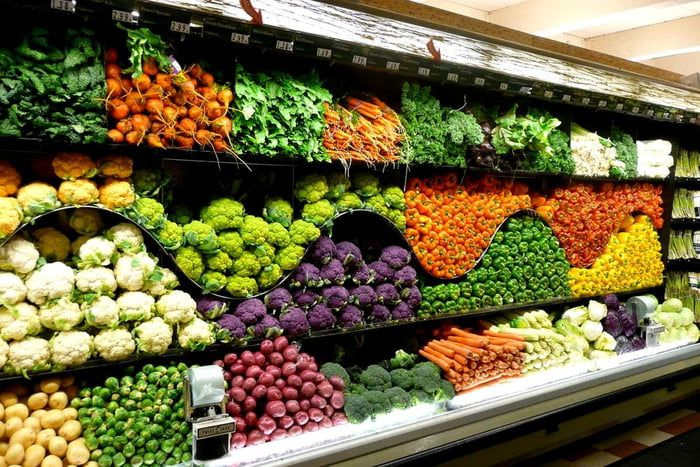

# Optimizing Goods Placement and Layout in the Grocery Store Produce Section

## Executive Summary
The grocery store's produce section has been assessed for its arrangement of goods and overall effectiveness. The primary goal of this plan is to enhance the visibility and accessibility of products, reduce waste through sustainable practices, and ultimately increase customer satisfaction and sales.

## Detailed Analysis and Insights
The analysis of the current goods arrangement revealed several key findings:
- **Visibility and Accessibility:** While many products are well-displayed, some items, particularly those on the top shelves, lack clear labeling, making it difficult for customers to identify them quickly.
- **Seasonal Engagement:** Seasonal produce is not prominently showcased, which may lead to missed sales opportunities.
- **Cross-Selling Potential:** There is an opportunity to cluster complementary items more effectively to encourage additional purchases.
- **Sustainability Practices:** Current practices lack a robust system for managing produce nearing its expiration, contributing to unnecessary waste.

## Proposed Changes to Existing Arrangements
| Product/Category         | Current Location        | Recommended New Location   | Justification                        |
|--------------------------|-------------------------|----------------------------|--------------------------------------|
| Leafy Greens             | Top Shelf               | Middle Shelf               | Increases accessibility and visibility for shoppers. |
| Cauliflower              | Middle Shelf            | Top Shelf                  | Promotes visibility for a less popular item, enhancing sales potential. |
| Tomatoes                 | Middle Shelf            | Eye Level (Front)         | Encourages impulse buying by placing high-demand items at eye level. |
| Potatoes                 | Bottom Shelf            | Middle Shelf               | Improves accessibility and encourages higher sales of staple items. |
| Discounted Imperfect Produce | No dedicated space   | Create a Discount Rack     | Targets budget-conscious consumers and reduces waste. |

## Suggestions for New Items or Relocations
- **Introduce Organic Produce:** Adding more organic options can cater to health-conscious consumers and increase overall sales.
- **Relocate Herbs:** Position herbs near vegetables commonly used together (e.g., basil with tomatoes) to facilitate cross-selling.

## Implementation Roadmap
1. **Assess Resources Required:** Evaluate staffing needs for rearranging products and creating new displays.
2. **Rearrangement Timeline:** Plan to implement changes within the next 2 weeks to ensure minimal disruption.
3. **Monitor Risks:** Prepare for potential pushback from staff regarding new processes, especially in labeling and facing practices.

## Key Performance Indicators (KPIs)
- Sales uplift in the produce section.
- Improved customer satisfaction scores through surveys.
- Inventory turnover rates to monitor freshness and reduce waste.

## Expected Business Outcomes
- **Increased Revenue:** An expected uplift of 10-15% in sales due to improved product visibility and accessibility.
- **Enhanced Customer Experience:** Customers will find it easier to shop, leading to higher satisfaction and loyalty.
- **Optimized Space Utilization:** Better organization will maximize the use of available space, ensuring a well-stocked and appealing display.

## Visuals and Charts (Optional)
- [Visual data on sales trends before and after changes will be provided once the implementation is underway.]

By implementing these recommendations, the grocery store can significantly improve customer engagement, reduce waste, and boost overall sales in the produce section, aligning with current market trends and consumer preferences.